### Author: Gloria Caron Miriam B
TECHNICAL TASK 1 - PREDICTION USING SUPERVISED ML (LEVEL-BEGINNER)

#### PROBLEM STATEMENT:
To predict the percentage of marks of a student based on the number of study hours.<br> What will be predicted score if a student studies for 9.25 hrs/ day?

In [30]:
#importing the libraries required
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [31]:
url= "http://bit.ly/w-data"
data=pd.read_csv(url)

In [32]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [34]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


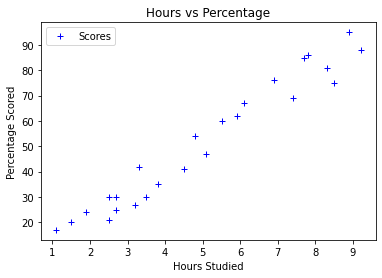

In [36]:
# Plotting the distribution of scores
data.plot(x='Hours',y='Scores',style='+',color='Blue')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

###  Preparing the Data
The next step is to divide the data into "attributes" (i.e. response variables) and "labels" (i.e. explanatory variables). In this dataset attributes will "Hours" and labels will be "Scores".


In [37]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [38]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [39]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

Next we split the dataset into test and training data.
 We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [40]:
from sklearn.model_selection import train_test_split
x_train ,x_test , y_train , y_test =train_test_split(x,y, test_size=0.2,random_state=0)

### Training the Algorithm

In [41]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print("Training Complete")

Training Complete


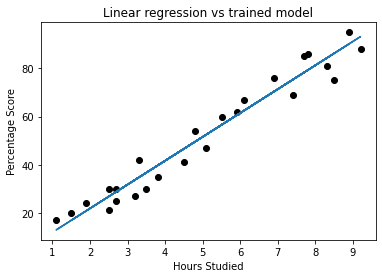

In [42]:
line = regressor.coef_*x+regressor.intercept_
plt.title("Linear regression vs trained model")
plt.scatter(x,y,color='black')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.plot(x,line);
plt.show()

###  Making Predictions
Now that we have trained our algorithm.Next, we will make predictions.

In [43]:
print(x_test)
y_pred=regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [44]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [45]:
df=pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<AxesSubplot:>

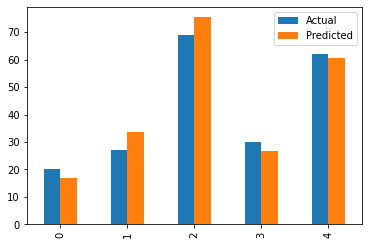

In [46]:
df.plot(kind='bar')

###  MODEL EVALUATION

In [64]:
from sklearn import metrics
print('Mean Absolute Error is: ', metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error is:  4.183859899002975


In [60]:
print ('R square value for train data is ',regressor.score(x_train,y_train))

R square value for train data is  0.9515510725211552


In [63]:
print ('R square value for test data is ',regressor.score(x_test,y_test))

R square value for test data is  0.9454906892105356


In [49]:
print("slope of regression line",regressor.coef_)
print("y-intercept of Regression line ", regressor.intercept_)

slope of regression line [9.91065648]
y-intercept of Regression line  2.018160041434683


####  INTERPRETATION : 
The best fitted simple linear equation is : y=2.018160041434662 + 9.91065648 (x).

In [62]:
# What will be predicted score if a student studies for 9.25 hrs/ day?
hours=9.25
test=np.array([hours])
test=test.reshape(-1,1)
pred=regressor.predict([[9.5]])
print("No of Hours ={}".format(hours))
print("Predicted Score ={}".format(pred[0]))

No of Hours =9.25
Predicted Score =96.16939660753593


###                   THANK YOU 